# Elena's EDA notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,\
RandomForestClassifier, BaggingClassifier, ExtraTreesRegressor, VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

# Modeling Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, recall_score, f1_score
from sklearn.metrics import classification_report, accuracy_score

# Pipelines
from imblearn.pipeline import Pipeline, make_pipeline

# SMOTE
from imblearn.over_sampling import SMOTE

In [2]:
import sys

sys.path.append("../../src")

from model_evaluation import plot_confusion_matrix

In [3]:
clean_df = pd.read_csv('../../data/combined.csv')
clean_df.head()

,emotion,txt_cleaned
0,0,product_target hr tweet riseaustin dead need u...
1,2,know awesome ipadiphone product_target youll l...
2,2,wait product_target also sale sxsw
3,0,hope year festival isnt crashy year iphone pro...
4,2,great stuff fri sxsw marissa mayer product_tar...


In [4]:
clean_df['emotion'].value_counts()

2    8224
0    8066
1    6346
Name: emotion, dtype: int64

In [7]:
clean_df.isna().sum()

emotion        0
txt_cleaned    0
dtype: int64

In [6]:
clean_df = clean_df.dropna()

In [8]:
# divides data into X and y, and then turns the model target labels into numerical format

X = clean_df['txt_cleaned'].values.astype('U')
y = clean_df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.25)

In [9]:
X_test

array(['thing would go festival',
       'good stuff happen america englandsucks',
       'dash accepts applepay thanks make happen mobilepayments paywithdash httptcooxwmavcscn',
       ...,
       'usually hate sport story news highly amused every report deflate ball deflategate ballghazi',
       'fuck third charger ive broke like two month u suck know',
       'announce threeday festival lineup definitely short talent april amp getready'],
      dtype='<U147')

# Multinomial Naive Bayes

In [10]:
X_t

array(['look forward hear google present today sxsw',
       'buzzscore fall behind deflategate',
       'lot egg face pat hater reporter mark brunnells world deflategate',
       ..., 'gotta switch android life galaxy',
       'page story belichicks conference lie blame ball prep weather watch deflategate poorjournalism',
       'line'], dtype='<U147')

### TF-IDF Vectorizer

In [34]:
pipeline_nb_tf = make_pipeline(TfidfVectorizer(), MultinomialNB())
pipeline_nb_tf

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [35]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
# Define the parameter grid
grid_nb_tf = {
    'tfidfvectorizer__min_df': [1, 2],
    'tfidfvectorizer__max_df': [0.01, 0.05, 0.25],
    'tfidfvectorizer__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3)],
    'tfidfvectorizer__norm': ('l1', 'l2'),
    'multinomialnb__alpha': [1, 0.1, 0.01, 0.001]   
}

In [36]:
gs_nb_tf = GridSearchCV(pipeline_nb_tf, grid_nb_tf, cv=3)

In [37]:
gs_nb_tf.fit(X_t, y_t)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'multinomialnb__alpha': [1, 0.1, 0.01, 0.001],
                         'tfidfvectorizer__max_df': [0.01, 0.05, 0.25],
                         'tfidfvectorizer__min_df': [1, 2],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2), (2, 3),
                                                          (3, 3)],
                         'tfidfvectorizer__norm': ('l1', 'l2')})

In [38]:
gs_nb_tf.best_params_

{'multinomialnb__alpha': 0.1,
 'tfidfvectorizer__max_df': 0.25,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 2),
 'tfidfvectorizer__norm': 'l2'}

In [39]:
gs_nb_tf.best_estimator_

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.25, ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [40]:
#gs_nb_tf.fit(X_val, y_val)

In [41]:
y_pred_nb_tf = gs_nb_tf.predict(X_val)
accuracy_score(y_val, y_pred_nb_tf)

0.6395376267987734

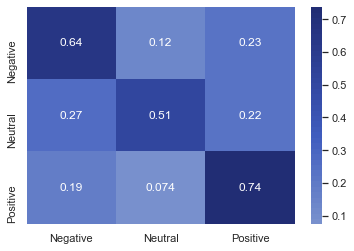

In [42]:
plot_confusion_matrix(y_val,y_pred_nb_tf)

In [171]:
gs_nb_tf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'multinomialnb__alpha': [1, 0.1, 0.01, 0.001],
                         'tfidfvectorizer__max_df': [0.01, 0.05, 0.25],
                         'tfidfvectorizer__min_df': [1, 2],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2), (2, 3),
                                                          (3, 3)],
                         'tfidfvectorizer__norm': ('l1', 'l2')})

In [172]:
y_pred_nb_tf_test = gs_nb_tf.predict(X_test)
accuracy_score(y_test, y_pred_nb_tf_test)

0.640481245576787

In [173]:
gs_nb_tf.best_score_

0.6303526330591603

In [175]:
gs_nb_tf.best_estimator_.score(X_test, y_test)

0.640481245576787

In [70]:
gs_nb_tf.cv_results_

{'mean_fit_time': array([0.36645897, 0.32632391, 0.48504567, 0.45964694, 0.41985671,
        0.39337905, 0.56110287, 0.55280511, 0.41444039, 0.38268073,
        0.34442767, 0.31566477, 0.41114918, 0.39038269, 0.34401083,
        0.34146778, 0.40531874, 0.41526135, 0.30415837, 0.30325596,
        0.38134782, 0.34892686, 0.50335654, 0.48288727, 0.43204093,
        0.40545972, 0.5862066 , 0.56577428, 0.41705831, 0.39891418,
        0.36298815, 0.3468043 , 0.43707299, 0.42373133, 0.35071731,
        0.36155192, 0.41380803, 0.42648276, 0.30764143, 0.30401953,
        0.3847084 , 0.35747584, 0.52197949, 0.48750464, 0.43026622,
        0.40079776, 0.56381408, 0.55678264, 0.4112289 , 0.39793555,
        0.37033431, 0.34595593, 0.43108932, 0.42928394, 0.35693494,
        0.35847322, 0.41526635, 0.42442695, 0.30227145, 0.30401913,
        0.38493371, 0.35361536, 0.52248478, 0.48623498, 0.42983031,
        0.39823556, 0.56373628, 0.57148194, 0.43115369, 0.40556343,
        0.3695236 , 0.36987034,

### Count Vectorizer

In [20]:
pipeline_nb_cv = make_pipeline(CountVectorizer(), MultinomialNB())
pipeline_nb_cv

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [21]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
# Define the parameter grid
grid_nb_cv = {
    'countvectorizer__min_df': [1, 2],
    'countvectorizer__max_df': [0.1, 0.25],
    'countvectorizer__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3)],
    'multinomialnb__alpha': [1, 0.1, 0.01]   
}

In [22]:
# Initialize the gridsearch object with three-fold cross-validation
gs_nb_cv = GridSearchCV(pipeline_nb_cv, grid_nb_cv, cv=3)

In [23]:
gs_nb_cv.fit(X_t, y_t)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'countvectorizer__max_df': [0.1, 0.25],
                         'countvectorizer__min_df': [1, 2],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2), (2, 3),
                                                          (3, 3)],
                         'multinomialnb__alpha': [1, 0.1, 0.01]})

In [24]:
gs_nb_cv.best_params_

{'countvectorizer__max_df': 0.25,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 2),
 'multinomialnb__alpha': 1}

In [25]:
gs_nb_cv.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.25, ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB(alpha=1))])

In [26]:
y_pred_nb_cv = gs_nb_cv.predict(X_val)
accuracy_score(y_val, y_pred_nb_cv)

0.6461429582448691

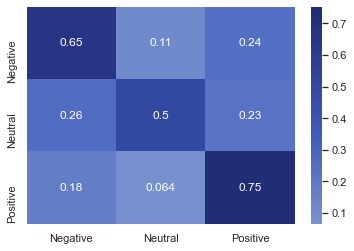

In [30]:
plot_confusion_matrix(y_val,y_pred_nb_cv)

In [31]:
gs_nb_cv.best_score_

0.6224940043209487

In [32]:
gs_nb_cv.best_estimator_.score(X_val, y_val)

0.6461429582448691

In [33]:
gs_nb_cv.cv_results_

{'mean_fit_time': array([0.1015083 , 0.0939486 , 0.09266265, 0.24593401, 0.24441036,
        0.24316939, 0.18653417, 0.18572426, 0.18419496, 0.33578912,
        0.35595814, 0.38229497, 0.21392632, 0.19131851, 0.19523938,
        0.09108845, 0.09257809, 0.09306701, 0.19422531, 0.19936975,
        0.18646669, 0.13605674, 0.13910031, 0.13709029, 0.21740262,
        0.23306561, 0.2302897 , 0.13542477, 0.13928501, 0.14610235,
        0.09742721, 0.09570543, 0.09706593, 0.24943089, 0.25297562,
        0.25183161, 0.19627269, 0.20115932, 0.19542821, 0.34330448,
        0.37786635, 0.36023172, 0.20547628, 0.22596566, 0.20331709,
        0.09212907, 0.08917459, 0.09086132, 0.20823272, 0.19342931,
        0.18711925, 0.13853137, 0.14258353, 0.14605864, 0.2291611 ,
        0.2217749 , 0.22316241, 0.16593154, 0.13471778, 0.12910803]),
 'std_fit_time': array([0.01241768, 0.00142118, 0.0012448 , 0.00324748, 0.00155105,
        0.00061125, 0.00279549, 0.0007554 , 0.00219225, 0.00331811,
        0.015

In [179]:
gs_nb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'countvectorizer__max_df': [0.1, 0.25],
                         'countvectorizer__min_df': [1, 2],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2), (2, 3),
                                                          (3, 3)],
                         'multinomialnb__alpha': [1, 0.1, 0.01]})

In [180]:
y_pred_nb_cv_test = gs_nb_cv.predict(X_test)
accuracy_score(y_test, y_pred_nb_cv_test)

0.6461429582448691

# FSM: Multinomial Naive Bayes

In [33]:
mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_t_vec)
accuracy_score(y_t, y_hat)

0.8622511174319383

In [98]:
y_hat2 = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.8355663824604141

In [34]:
X_t_vec.sample(1).max(axis = 1)

4732    0.817702
dtype: float64

In [99]:
confusion_matrix(y_val, y_hat2)

array([[ 14,   0, 116],
       [  0,   0,  19],
       [  0,   0, 672]])

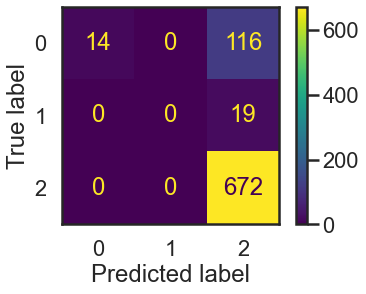

In [100]:
plot_confusion_matrix(mnb, X_val_vec, y_val)

In [39]:
 mnb.feature_log_prob_[0, :].argsort()

array([   0, 7666, 7667, ..., 8434, 2051, 3452])

In [40]:
pos_emotion_sorted = mnb.feature_log_prob_[0, :].argsort()
neg_emotion_sorted = mnb.feature_log_prob_[1, :].argsort()
no_emotion_sorted = mnb.feature_log_prob_[2, :].argsort()

print(np.take(tfidf.get_feature_names(), pos_emotion_sorted[-10:]))
print(np.take(tfidf.get_feature_names(), neg_emotion_sorted[-10:]))
print(np.take(tfidf.get_feature_names(), no_emotion_sorted[-10:]))

['heat million sun' 'ipads back button' 'button heat million'
 'fade fast among' 'among digital delegate' 'fast among digital'
 'elegant fascist company' 'quotapple elegant fascist'
 'classy fascist company' 'fascist company americaquot']
['want nonprofitsquot yes' 'quotiava want nonprofitsquot'
 'bc deserve nothing' 'nonprofitsquot yes bc' 'yes bc deserve'
 'tablet call morning' 'circle new social' 'popup store store'
 'launch new social' 'new social network']
['temporary store downtown' 'school marketing expert'
 'network call circle' 'open temporary store' 'social network call'
 'major new social' 'launch major new' 'new social network'
 'store downtown austin' 'even begin win']


In [ ]:
['network call circle' 'major new social' 'launch major new'
 'social network call' 'temporary store downtown'
 'school marketing expert' 'open temporary store' 'new social network'
 'store downtown austin' 'even begin win']
['network call circle' 'best thing ive' 'thing ive heard'
 'classy fascist company' 'quotapple elegant fascist'
 'social network call' 'new social network' 'major new social'
 'fascist company americaquot' 'fade fast among']
['popup store austin' 'store downtown austin' 'open temporary store'
 'circle possibly today' 'call circle possibly' 'launch major new'
 'major new social' 'network call circle' 'social network call'
 'new social network']

In [ ]:
new social network          80.137694
social network call         69.935329
network call circle         65.313997
major new social            64.712864
launch major new            63.743781
call circle possibly        54.022252
circle possibly today       54.005559
open temporary store        38.100215
store downtown austin       36.312710
temporary store downtown    27.969892
popup store austin          24.687708
open popup store            24.318210
downtown austin launch      23.002409
open popup shop             21.364177
launch new social           20.361676
rumor open temporary        19.746143

In [41]:
print(np.take(tfidf.get_feature_names(), pos_emotion_sorted[:10]))
print(np.take(tfidf.get_feature_names(), neg_emotion_sorted[:10]))
print(np.take(tfidf.get_feature_names(), no_emotion_sorted[:10]))

['02 symbian window' 'party calendar put' 'party cant wait'
 'party cause party' 'party congress ave' 'party depeche mode'
 'party detail reveal' 'party djroe store' 'party dont think'
 'party fun good']
['02 symbian window' 'pop shop time' 'pop store 15' 'pop store buy'
 'pop store come' 'pop store day' 'pop store downtown' 'pop store even'
 'pop store fly' 'pop store folk']
['ûóthe right house' 'crappy would never' 'crash amp fresh'
 'crash cause lose' 'crash every 10mins' 'crash every time'
 'one form factor' 'crashy year app' 'one every people' 'one doc taking']


# Logistic Regression

In [11]:
# Count Vectorizer ngram range is chosen (1,2) based on 
# Multinomial NB pipeline best parameters and it shows the best results for Logistic Regression as well 

cv = CountVectorizer(ngram_range = (1,2))
X_t_vec = cv.fit_transform(X_t)
X_val_vec = cv.transform(X_val)

X_train_vec = cv.fit_transform(X_train)
X_test_vec = cv.transform(X_test)

In [10]:
# Count Vectorizer performs slightly better than TF-IDF, no need to run this cell

tfidf = TfidfVectorizer(ngram_range = (1,2))
X_t_vec = tfidf.fit_transform(X_t)
X_val_vec = tfidf.transform(X_val)

In [194]:
#lr = LogisticRegression(penalty='l2', C=0.1, class_weight='balanced', solver ='lbfgs')
#lr.fit(X_t_vec, y_t)

LogisticRegression(C=0.1, class_weight='balanced')

In [12]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_t_vec, y_t)

LogisticRegression(max_iter=1000)

In [13]:
y_pred_lg = lr.predict(X_val_vec)
accuracy_score(y_val, y_pred_lg)

0.6605331446095777

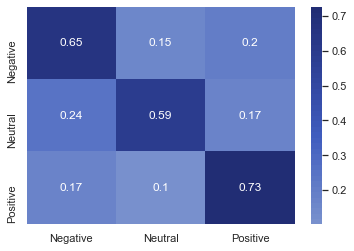

In [14]:
plot_confusion_matrix(y_val,y_pred_lg)

In [15]:
# Full train data

lr.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Test data

y_pred_lg = lr.predict(X_test_vec)
accuracy_score(y_test, y_pred_lg)

0.6684359518754424

In [17]:
import pickle 
  
# Save the trained model as a pickle string. 
with open('../../src/final_model.pkl', 'wb') as f:
    pickle.dump(lr, f)


In [18]:
X_t_vec.shape

(12715, 70386)

In [19]:
lr_neg_emotion_sorted = lr.coef_[0, :].argsort()
lr_no_emotion_sorted = lr.coef_[1, :].argsort()
lr_pos_emotion_sorted = lr.coef_[2, :].argsort()

print(np.take(cv.get_feature_names(), lr_neg_emotion_sorted[-10:]))
print(np.take(cv.get_feature_names(), lr_no_emotion_sorted[-10:]))
print(np.take(cv.get_feature_names(), lr_pos_emotion_sorted[-10:]))

['fail' 'phone' 'fuck' 'battery' 'suck' 'impressed' 'fix' 'weak' 'charger'
 'brutality']
['balloon' 'humor' 'skit' 'aapl' 'who go' 'joke' 'funny' 'parody'
 'hilarious' 'meme']
['amazing' 'get ticket' 'congrats' 'cant wait' 'amaze' 'cheat' 'tired'
 'cheatriots' 'cheater' 'sxsw']


In [181]:
lr_pos_emotion_sorted = lr.coef_[0, :].argsort()
lr_neg_emotion_sorted = lr.coef_[1, :].argsort()
lr_no_emotion_sorted = lr.coef_[2, :].argsort()

print(np.take(tfidf.get_feature_names(), lr_pos_emotion_sorted[-10:]))
print(np.take(tfidf.get_feature_names(), lr_neg_emotion_sorted[-10:]))
print(np.take(tfidf.get_feature_names(), lr_no_emotion_sorted[-10:]))

IndexError: index 58598 is out of bounds for axis 0 with size 14742

In [56]:
['network call circle' 'major new social' 'launch major new'
 'social network call' 'temporary store downtown'
 'school marketing expert' 'open temporary store' 'new social network'
 'store downtown austin' 'even begin win']
['network call circle' 'best thing ive' 'thing ive heard'
 'classy fascist company' 'quotapple elegant fascist'
 'social network call' 'new social network' 'major new social'
 'fascist company americaquot' 'fade fast among']
['popup store austin' 'store downtown austin' 'open temporary store'
 'circle possibly today' 'call circle possibly' 'launch major new'
 'major new social' 'network call circle' 'social network call'
 'new social network']

['popup store austinstore downtown austinopen temporary storecircle possibly todaycall circle possiblylaunch major newmajor new socialnetwork call circlesocial network callnew social network']

In [201]:
coeffs = pd.Series(lr_SMOTE.coef_[0], index=X_val_vec.columns.values)
coeffs = coeffs.sort_values(ascending = False)
#print(coeffs[:10])

AttributeError: columns not found

In [58]:
coeffs = pd.Series(lr_SMOTE.coef_[1], index=X_val_vec.columns.values)
coeffs = coeffs.sort_values(ascending = False)
print(coeffs[:10])

quotparty like 1986quot     0.823325
cant wait give              0.673563
circle loom google          0.538750
google nerd social          0.538750
loom google nerd            0.538750
design interface new        0.393417
new navigation schema       0.393417
interface new navigation    0.348416
call circle possibly        0.326496
circle possibly today       0.324462
dtype: float64


In [59]:
coeffs = pd.Series(lr_SMOTE.coef_[2], index=X_val_vec.columns.values)
coeffs = coeffs.sort_values(ascending = False)
print(coeffs[:10])

even begin win             0.473806
open popup store           0.323671
open temporary store       0.320348
store downtown austin      0.245862
quotapple come cool        0.224959
dont go conferencesquot    0.209089
one ever hear              0.206984
popup store austin         0.204840
route around traffic       0.184580
come cool technology       0.164265
dtype: float64


In [139]:
y_hat_test = lr_SMOTE.predict(X_test)

ValueError: could not convert string to float: '\x89ûï@mention doesnt place value domain extension equal'

# Random Forest

In [103]:
rf = RandomForestClassifier(n_estimators=1000, max_features=5, max_depth=5)
rf.fit(X_t_vec, y_t)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=1000)

In [104]:
y_hat = rf.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.3597546591177164

In [105]:
pipeline = make_pipeline(SMOTE(), RandomForestClassifier())
pipeline

Pipeline(steps=[('smote', SMOTE()),
                ('randomforestclassifier', RandomForestClassifier())])

In [106]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
# Define the parameter grid
grid = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ["auto", "sqrt", "log2"],
    'randomforestclassifier__criterion' : ["gini", "entropy"]
    
}

In [107]:
# Initialize the gridsearch object with three-fold cross-validation
gs = GridSearchCV(pipeline, grid, cv=5)

In [108]:
gs.fit(X_t_vec, y_t)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_features': ['auto',
                                                                  'sqrt',
                                                                  'log2'],
                         'randomforestclassifier__n_estimators': [100, 200]})

In [110]:
gs.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__n_estimators': 100}

In [111]:
gs.best_estimator_

Pipeline(steps=[('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='log2'))])

In [113]:
y_pred_final = gs.predict(X_val_vec)
accuracy_score(y_val, y_pred_final)

0.6588818117480538

In [114]:
gs.best_score_

0.6478961856075502

In [116]:
gs.best_estimator_.score(X_val_vec, y_val)

0.6588818117480538

In [117]:
gs.cv_results_

{'mean_fit_time': array([24.09810796, 46.98651309, 23.82965741, 46.96558852, 30.54141326,
        60.18758368, 24.14386764, 47.78008571, 24.12288399, 47.88034105,
        30.74561791, 61.54912977]),
 'std_fit_time': array([0.46399792, 0.48555014, 0.30545791, 0.67445474, 0.56218861,
        0.69504875, 0.19558013, 0.48453492, 0.24535956, 0.48896532,
        0.41670831, 0.8124697 ]),
 'mean_score_time': array([0.18688397, 0.38112049, 0.18528314, 0.38103275, 0.39523625,
        0.8161778 , 0.19364052, 0.35234818, 0.17629061, 0.36424532,
        0.39457669, 0.84372158]),
 'std_score_time': array([0.01110443, 0.03167556, 0.00818125, 0.02730902, 0.01148001,
        0.03217504, 0.02045851, 0.00933749, 0.00407845, 0.02463659,
        0.01190103, 0.04368167]),
 'param_randomforestclassifier__criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
              mask=[